In [ ]:
import pandas as pd
df = pd.read_csv('us-vaccines.csv',error_bad_lines=False)

In [ ]:
NY = df[df.Entity == 'New York State'].reset_index()

In [ ]:
NY = NY[['Day','daily_vaccinations']]

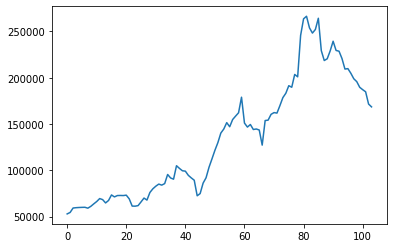

In [ ]:
import matplotlib.pyplot as plt
plt.plot(NY['daily_vaccinations'])

### Stationarity test of cumulative

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(NY['daily_vaccinations'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pvalue

0.6577072038700005

In [ ]:
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm

#set parameter range
p = range(0,3)
q = range(1,3)
d = range(1,2)
s = [7,30,60,180,365]
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, s))
# SARIMA model pipeline
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(Daily_cases,order=param,seasonal_order=param_seasonal)
      results = mod.fit(max_iter = 50, method = 'powell')
      print('SARIMA{},{} - AIC:{}'.format(param, param_seasonal, results.aic))
    except:
      continue

In [ ]:
#NY Daily Cases: SARIMA(2, 1, 2),(1, 1, 1, 7) - AIC:7020.763322288931
#NY Deaths (2, 1, 1),(1, 1, 1, 7) 
#VA Deaths SARIMA(1, 1, 1),(0, 1, 1, 7)

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm

def walk_forward_validation(data, n_test):
    predictions = np.array([])
    mape_list = []
    train, test = data[:n_test], data[n_test:]
    day_list = [7,14,21,28] # weeks 1,2,3,4
    model = sm.tsa.statespace.SARIMAX(train, order=(1,1,1), seasonal_order = (1,1,1,7))
    model = model.fit(max_iter = 50,method = 'powell')
    forecast = model.forecast(steps = len(test))
    #predictions = np.concatenate((predictions, forecast),axis=None)
    mape_score = (abs(test-forecast)/test)
    mape_mean = mape_score.mean()
    return forecast, mape_mean

In [ ]:
data = NY['daily_vaccinations']
n_test = int(0.7*len(data))
train, test = data[:n_test], data[n_test:]
predictions, mape_mean = walk_forward_validation(data,n_test)
print(mape_mean)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Optimization terminated successfully.
         Current function value: 9.342136
         Iterations: 4
         Function evaluations: 244
0.15850910543583965


In [ ]:
print(len(data) - n_test)

32


In [ ]:
from sklearn.metrics import r2_score
r2_score(test, predictions)

-1.1670127105342245

In [ ]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(test, predictions))

42647.00998099548

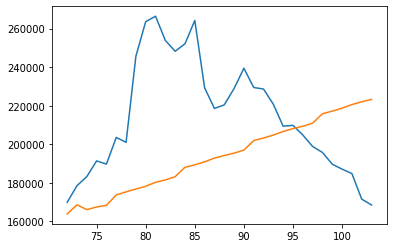

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test)
plt.plot(predictions)